<h1>Bakeries research in the city of Athens

Case: Client wants to expand his bakery business to one of the neighborhoods: Koukaki, Neos Kosmos, Agios Artemios, Makrygianni, Pangrati & Nea Smyrni near the centre of Athens. He wants to know how many where are the bakeries in each neighborhood

In [1]:
#import Libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
import os
import requests # library to handle requests
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
#!pip install geopy


print('Libraries imported.')

Libraries imported.


In [2]:
#Create the list of the Neighborhoods that the client asked to research

neighborhoods = {'Neighborhood': ["Koukaki, Athens", "Neos Kosmos, Athens", "Agios Artemios, Athens", "Makrygianni, Athens", "Pangrati, Athens", "Nea Smyrni, Athens"]
        }

df = pd.DataFrame(neighborhoods, columns = ['Neighborhood'])
print(df.shape)
df


(6, 1)


,Neighborhood
0,"Koukaki, Athens"
1,"Neos Kosmos, Athens"
2,"Agios Artemios, Athens"
3,"Makrygianni, Athens"
4,"Pangrati, Athens"
5,"Nea Smyrni, Athens"


In [3]:
#Get the Latitude and Longitude of the Neighborhoods

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="bakery-application")

df["loc"] = df["Neighborhood"].apply(geolocator.geocode)
df["point"]= df["loc"].apply(lambda loc: tuple(loc.point) if loc else None)
df[['lat', 'lon', 'altitude']] = pd.DataFrame(df['point'].to_list(), index=df.index)

In [4]:
df

,Neighborhood,loc,point,lat,lon,altitude
0,"Koukaki, Athens","(Κουκάκι, Δουργούτι, Αθήνα, Δήμος Αθηναίων, Πε...","(37.9634559, 23.7220234, 0.0)",37.963456,23.722023,0.0
1,"Neos Kosmos, Athens","(Νέος Κόσμος, Κασομούλη, Κυνοσάργους, Συνοικία...","(37.9576705, 23.7283724, 0.0)",37.957670,23.728372,0.0
2,"Agios Artemios, Athens","(Άγιος Αρτέμιος, Προφήτης Ηλίας, Αθήνα, Δήμος ...","(37.9603927, 23.742542, 0.0)",37.960393,23.742542,0.0
3,"Makrygianni, Athens","(Μακρυγιάννη, Αναφιώτικα, Κολωνάκι, Αθήνα, Δήμ...","(37.9687219, 23.7295949, 0.0)",37.968722,23.729595,0.0
4,"Pangrati, Athens","(Συνοικία Παγκρατίου, Αθήνα, Δήμος Αθηναίων, Π...","(37.9698825, 23.7465995, 0.0)",37.969882,23.746599,0.0
5,"Nea Smyrni, Athens","(Νέα Σμύρνη, Δήμος Νέας Σμύρνης, Περιφερειακή ...","(37.9467441, 23.7138357, 0.0)",37.946744,23.713836,0.0


In [129]:
#Rename loc, lat, lon columns
df_neigh = df.rename(columns={'lat': 'Latitude', 'lon': 'Longitude', 'loc': 'Location'})
df_neigh

,Neighborhood,Location,point,Latitude,Longitude,altitude
0,"Koukaki, Athens","(Κουκάκι, Δουργούτι, Αθήνα, Δήμος Αθηναίων, Πε...","(37.9634559, 23.7220234, 0.0)",37.963456,23.722023,0.0
1,"Neos Kosmos, Athens","(Νέος Κόσμος, Κασομούλη, Κυνοσάργους, Συνοικία...","(37.9576705, 23.7283724, 0.0)",37.957670,23.728372,0.0
2,"Agios Artemios, Athens","(Άγιος Αρτέμιος, Προφήτης Ηλίας, Αθήνα, Δήμος ...","(37.9603927, 23.742542, 0.0)",37.960393,23.742542,0.0
3,"Makrygianni, Athens","(Μακρυγιάννη, Αναφιώτικα, Κολωνάκι, Αθήνα, Δήμ...","(37.9687219, 23.7295949, 0.0)",37.968722,23.729595,0.0
4,"Pangrati, Athens","(Συνοικία Παγκρατίου, Αθήνα, Δήμος Αθηναίων, Π...","(37.9698825, 23.7465995, 0.0)",37.969882,23.746599,0.0
5,"Nea Smyrni, Athens","(Νέα Σμύρνη, Δήμος Νέας Σμύρνης, Περιφερειακή ...","(37.9467441, 23.7138357, 0.0)",37.946744,23.713836,0.0


In [6]:
# print the number of rows of the dataframe
df_neigh.shape

(6, 6)

In [7]:
#install folium map 

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library


Solving environment: done

# All requested packages already installed.



In [8]:
#Use geopy library to get the latitude and longitude values of Athens.

address = ['Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Athens are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Athens are Latitude: 37.9839412, Longitude: 23.7283052.


In [9]:
#Create a map of Athens with the neighborhoods superimposed on top.

map_athens = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for neighborhood, lat, lng in zip(df_neigh['Neighborhood'], df_neigh['Latitude'], df_neigh['Longitude']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_athens)  
    
map_athens

Utilizing the Foursquare API to explore the neighborhoods and segment them.

In [10]:
#Define Foursquare Credentials and Version
CLIENT_ID = '05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N' # your Foursquare ID
CLIENT_SECRET = 'XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E' # your Foursquare Secret
VERSION = '20200814' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: 05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N
CLIENT_SECRET:XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E


<h1> Explore the 1st area: "Koukaki"

In [11]:
#Get the first neighborhood's name.

df_neigh.head(10)



,Neighborhood,Location,point,Latitude,Longitude,altitude
0,"Koukaki, Athens","(Κουκάκι, Δουργούτι, Αθήνα, Δήμος Αθηναίων, Πε...","(37.9634559, 23.7220234, 0.0)",37.963456,23.722023,0.0
1,"Neos Kosmos, Athens","(Νέος Κόσμος, Κασομούλη, Κυνοσάργους, Συνοικία...","(37.9576705, 23.7283724, 0.0)",37.957670,23.728372,0.0
2,"Agios Artemios, Athens","(Άγιος Αρτέμιος, Προφήτης Ηλίας, Αθήνα, Δήμος ...","(37.9603927, 23.742542, 0.0)",37.960393,23.742542,0.0
3,"Makrygianni, Athens","(Μακρυγιάννη, Αναφιώτικα, Κολωνάκι, Αθήνα, Δήμ...","(37.9687219, 23.7295949, 0.0)",37.968722,23.729595,0.0
4,"Pangrati, Athens","(Συνοικία Παγκρατίου, Αθήνα, Δήμος Αθηναίων, Π...","(37.9698825, 23.7465995, 0.0)",37.969882,23.746599,0.0
5,"Nea Smyrni, Athens","(Νέα Σμύρνη, Δήμος Νέας Σμύρνης, Περιφερειακή ...","(37.9467441, 23.7138357, 0.0)",37.946744,23.713836,0.0


In [12]:
#Let's explore the first neighborhood "Koukaki" in our dataframe.

koukaki_latitude = df_neigh.loc[0, 'Latitude'] # neighborhood latitude value
koukaki_longitude = df_neigh.loc[0, 'Longitude'] # neighborhood longitude value

koukaki = df_neigh.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(koukaki, 
                                                               koukaki_latitude, 
                                                               koukaki_longitude))

Latitude and longitude values of Koukaki, Athens are 37.9634559, 23.7220234.


In [13]:
#get the bakeries that are in "Koukaki" within a radius of 250 meters.
#bakery id= 4bf58dd8d48988d16a941735
#create the GET request URL
LIMIT = 50
radius = 250

url_koukaki = 'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9634559,23.7220234&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    koukaki_latitude, 
    koukaki_longitude, 
    radius, 
    LIMIT)
url_koukaki # display URL




'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9634559,23.7220234&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'

In [14]:
#Send the GET request and examine the resutls

results_koukaki = requests.get(url_koukaki).json()


In [15]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#clean the json and structure it into a *pandas* dataframe.

venues_koukaki = results_koukaki ['response']['venues']

In [16]:
nearby_venues_koukaki = pd.json_normalize(venues_koukaki) # flatten JSON


In [17]:
# filter columns
filtered_columns = ['name','location.lat','location.lng']
nearby_venues_koukaki =nearby_venues_koukaki.loc[:, filtered_columns]
nearby_venues_koukaki.head()

,name,location.lat,location.lng
0,Ρίζος,37.963495,23.720000
1,Μαμά ψωμί,37.964653,23.722377
2,Το Παραδοσιακό,37.964173,23.721083
3,Κουκακιώτικη Γωνιά,37.962538,23.722006
4,DouxCook@Ki,37.964797,23.723926


In [128]:
#Rename name, location.lat, location.lng columns
koukaki_bakeries = nearby_venues_koukaki.rename(columns={'name': 'Bakery', 'location.lat': 'Latitude', 'location.lng': 'Longitude'})

print(koukaki_bakeries.shape)
koukaki_bakeries



(9, 3)


,Bakery,Latitude,Longitude
0,Ρίζος,37.963495,23.720000
1,Μαμά ψωμί,37.964653,23.722377
2,Το Παραδοσιακό,37.964173,23.721083
3,Κουκακιώτικη Γωνιά,37.962538,23.722006
4,DouxCook@Ki,37.964797,23.723926
5,Κουλουρότοπος,37.962964,23.724139
6,Baking Room,37.964794,23.723812
7,Primo Πιτολιχουδιες,37.963579,23.721332
8,Ο Φούρνος Του Λιάρου,37.962418,23.718682


In [19]:
#And how many recommended places were returned by Foursquare?

print('{} bakeries were returned by Foursquare.'.format(koukaki_bakeries.shape[0]))

9 bakeries were returned by Foursquare.


In [20]:
#Use geopy library to get the latitude and longitude values of Koukaki.

address = ['Koukaki, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Koukaki are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Koukaki are Latitude: 37.9634559, Longitude: 23.7220234.


<h4>Locations of the Bakeries on the map

In [21]:
map_koukaki = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, name in zip(koukaki_bakeries['Latitude'], koukaki_bakeries['Longitude'], koukaki_bakeries['Bakery']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_koukaki)  
    
map_koukaki

<h1>Explore the 2nd area: "Neos Kosmos"

In [22]:
df_neigh

,Neighborhood,Location,point,Latitude,Longitude,altitude
0,"Koukaki, Athens","(Κουκάκι, Δουργούτι, Αθήνα, Δήμος Αθηναίων, Πε...","(37.9634559, 23.7220234, 0.0)",37.963456,23.722023,0.0
1,"Neos Kosmos, Athens","(Νέος Κόσμος, Κασομούλη, Κυνοσάργους, Συνοικία...","(37.9576705, 23.7283724, 0.0)",37.957670,23.728372,0.0
2,"Agios Artemios, Athens","(Άγιος Αρτέμιος, Προφήτης Ηλίας, Αθήνα, Δήμος ...","(37.9603927, 23.742542, 0.0)",37.960393,23.742542,0.0
3,"Makrygianni, Athens","(Μακρυγιάννη, Αναφιώτικα, Κολωνάκι, Αθήνα, Δήμ...","(37.9687219, 23.7295949, 0.0)",37.968722,23.729595,0.0
4,"Pangrati, Athens","(Συνοικία Παγκρατίου, Αθήνα, Δήμος Αθηναίων, Π...","(37.9698825, 23.7465995, 0.0)",37.969882,23.746599,0.0
5,"Nea Smyrni, Athens","(Νέα Σμύρνη, Δήμος Νέας Σμύρνης, Περιφερειακή ...","(37.9467441, 23.7138357, 0.0)",37.946744,23.713836,0.0


In [23]:
#Let's explore the second neighborhood "Neos Kosmos" in our dataframe.

neos_kosmos_latitude = df_neigh.loc[1, 'Latitude'] # neighborhood latitude value
neos_kosmos_longitude = df_neigh.loc[1, 'Longitude'] # neighborhood longitude value

neos_kosmos = df_neigh.loc[1, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neos_kosmos, 
                                                               neos_kosmos_latitude, 
                                                               neos_kosmos_longitude))



Latitude and longitude values of Neos Kosmos, Athens are 37.9576705, 23.7283724.


In [24]:
#get the bakeries that are in "Neos Kosmos" within a radius of 250 meters.
#create the GET request URL
LIMIT = 50
radius = 250

url_neos_kosmos = 'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9569948,23.7270819&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neos_kosmos_latitude, 
    neos_kosmos_longitude, 
    radius, 
    LIMIT)
url_neos_kosmos # display URL




'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9569948,23.7270819&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'

In [25]:
#Send the GET request and get the resutls

results_neos_kosmos = requests.get(url_neos_kosmos).json()


In [26]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#clean the json and structure it into a *pandas* dataframe.

venues_neos_kosmos = results_neos_kosmos ['response']['venues']


In [27]:
nearby_venues_neos_kosmos = pd.json_normalize(venues_neos_kosmos) # flatten JSON


In [28]:
# filter columns
filtered_columns = ['name','location.lat','location.lng']
nearby_venues_neos_kosmos =nearby_venues_neos_kosmos.loc[:, filtered_columns]
nearby_venues_neos_kosmos.head()

,name,location.lat,location.lng
0,Εκ Σίτου,37.957173,23.726627
1,Mr Kostis,37.956427,23.724345
2,Αρτο-ζυμιά,37.958083,23.727889
3,Mon Koulour,37.957705,23.729924
4,Leonidas Αρτοποιία Ζαχαροπλαστική,37.957366,23.728620


In [127]:
#Rename name, location.lat, location.lng columns
neos_kosmos_bakeries = nearby_venues_neos_kosmos.rename(columns={'name': 'Bakery', 'location.lat': 'Latitude', 'location.lng': 'Longitude'})

print(neos_kosmos_bakeries.shape)
neos_kosmos_bakeries

(6, 3)


,Bakery,Latitude,Longitude
0,Εκ Σίτου,37.957173,23.726627
1,Mr Kostis,37.956427,23.724345
2,Αρτο-ζυμιά,37.958083,23.727889
3,Mon Koulour,37.957705,23.729924
4,Leonidas Αρτοποιία Ζαχαροπλαστική,37.957366,23.728620
5,Γεύσεις Όπως Παλιά,37.957368,23.730531


In [30]:
#And how many recommended places were returned by Foursquare?

print('{} bakeries were returned by Foursquare.'.format(neos_kosmos_bakeries.shape[0]))

6 bakeries were returned by Foursquare.


In [125]:
#Use geopy library to get the latitude and longitude values of Neos Kosmos.

address = ['Neos Kosmos, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Neos Kosmos are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Neos Kosmos are Latitude: 37.9576705, Longitude: 23.7283724.


<h4>Locations of the Bakeries on the map

In [126]:
map_neos_kosmos = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, name in zip(neos_kosmos_bakeries['Latitude'], neos_kosmos_bakeries['Longitude'], neos_kosmos_bakeries['Bakery']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_neos_kosmos)  
    
map_neos_kosmos

<h1> Explore the 3rd area: "Agios Artemios"

In [33]:
df_neigh

,Neighborhood,Location,point,Latitude,Longitude,altitude
0,"Koukaki, Athens","(Κουκάκι, Δουργούτι, Αθήνα, Δήμος Αθηναίων, Πε...","(37.9634559, 23.7220234, 0.0)",37.963456,23.722023,0.0
1,"Neos Kosmos, Athens","(Νέος Κόσμος, Κασομούλη, Κυνοσάργους, Συνοικία...","(37.9576705, 23.7283724, 0.0)",37.957670,23.728372,0.0
2,"Agios Artemios, Athens","(Άγιος Αρτέμιος, Προφήτης Ηλίας, Αθήνα, Δήμος ...","(37.9603927, 23.742542, 0.0)",37.960393,23.742542,0.0
3,"Makrygianni, Athens","(Μακρυγιάννη, Αναφιώτικα, Κολωνάκι, Αθήνα, Δήμ...","(37.9687219, 23.7295949, 0.0)",37.968722,23.729595,0.0
4,"Pangrati, Athens","(Συνοικία Παγκρατίου, Αθήνα, Δήμος Αθηναίων, Π...","(37.9698825, 23.7465995, 0.0)",37.969882,23.746599,0.0
5,"Nea Smyrni, Athens","(Νέα Σμύρνη, Δήμος Νέας Σμύρνης, Περιφερειακή ...","(37.9467441, 23.7138357, 0.0)",37.946744,23.713836,0.0


In [34]:
#Let's explore the third neighborhood "Agios Artemios" in our dataframe.

agios_artemios_latitude = df_neigh.loc[2, 'Latitude'] # neighborhood latitude value
agios_artemios_longitude = df_neigh.loc[2, 'Longitude'] # neighborhood longitude value

agios_artemios = df_neigh.loc[2, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(agios_artemios, 
                                                               agios_artemios_latitude, 
                                                               agios_artemios_longitude))



Latitude and longitude values of Agios Artemios, Athens are 37.9603927, 23.742542.


In [35]:
#get the bakeries that are in "Agios Artemios" within a radius of 250 meters.
#create the GET request URL
LIMIT = 50
radius = 250

url_agios_artemios = 'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9603927,23.742542&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    agios_artemios_latitude, 
    agios_artemios_longitude, 
    radius, 
    LIMIT)
url_agios_artemios # display URL




'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9603927,23.742542&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'

In [36]:
#Send the GET request and examine the resutls

results_agios_artemios = requests.get(url_agios_artemios).json()


In [37]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#clean the json and structure it into a *pandas* dataframe.

venues_agios_artemios = results_agios_artemios ['response']['venues']


In [38]:
nearby_venues_agios_artemios = pd.json_normalize(venues_agios_artemios) # flatten JSON


In [39]:
# filter columns
filtered_columns = ['name','location.lat','location.lng']
nearby_venues_agios_artemios =nearby_venues_agios_artemios.loc[:, filtered_columns]
nearby_venues_agios_artemios.head()

,name,location.lat,location.lng
0,Άρτος & Τέχνη,37.958538,23.741595
1,Φούρνος ΣΤΑΘΗΣ,37.961305,23.744645
2,Ο φούρνος της γειτονιάς,37.959316,23.741972
3,Αρτοποιία Οικονομίδης,37.962795,23.742759


In [130]:
#Rename name, location.lat, location.lng columns
agios_artemios_bakeries = nearby_venues_agios_artemios.rename(columns={'name': 'Bakery', 'location.lat': 'Latitude', 'location.lng': 'Longitude'})

print(agios_artemios_bakeries.shape)
agios_artemios_bakeries

(4, 3)


,Bakery,Latitude,Longitude
0,Άρτος & Τέχνη,37.958538,23.741595
1,Φούρνος ΣΤΑΘΗΣ,37.961305,23.744645
2,Ο φούρνος της γειτονιάς,37.959316,23.741972
3,Αρτοποιία Οικονομίδης,37.962795,23.742759


In [41]:
#And how many recommended places were returned by Foursquare?

print('{} bakeries were returned by Foursquare.'.format(agios_artemios_bakeries.shape[0]))

4 bakeries were returned by Foursquare.


In [42]:
#Use geopy library to get the latitude and longitude values of Agios Artemios

address = ['Agios Artemios, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Agios Artemios are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Agios Artemios are Latitude: 37.9603927, Longitude: 23.742542.


<h4>Locations of the Bakeries on the map

In [43]:
map_agios_artemios = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, name in zip(agios_artemios_bakeries['Latitude'], agios_artemios_bakeries['Longitude'], agios_artemios_bakeries['Bakery']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_agios_artemios)  
    
map_agios_artemios

<h1> Explore the 4th area: "Makrygianni"

In [44]:
df_neigh

,Neighborhood,Location,point,Latitude,Longitude,altitude
0,"Koukaki, Athens","(Κουκάκι, Δουργούτι, Αθήνα, Δήμος Αθηναίων, Πε...","(37.9634559, 23.7220234, 0.0)",37.963456,23.722023,0.0
1,"Neos Kosmos, Athens","(Νέος Κόσμος, Κασομούλη, Κυνοσάργους, Συνοικία...","(37.9576705, 23.7283724, 0.0)",37.957670,23.728372,0.0
2,"Agios Artemios, Athens","(Άγιος Αρτέμιος, Προφήτης Ηλίας, Αθήνα, Δήμος ...","(37.9603927, 23.742542, 0.0)",37.960393,23.742542,0.0
3,"Makrygianni, Athens","(Μακρυγιάννη, Αναφιώτικα, Κολωνάκι, Αθήνα, Δήμ...","(37.9687219, 23.7295949, 0.0)",37.968722,23.729595,0.0
4,"Pangrati, Athens","(Συνοικία Παγκρατίου, Αθήνα, Δήμος Αθηναίων, Π...","(37.9698825, 23.7465995, 0.0)",37.969882,23.746599,0.0
5,"Nea Smyrni, Athens","(Νέα Σμύρνη, Δήμος Νέας Σμύρνης, Περιφερειακή ...","(37.9467441, 23.7138357, 0.0)",37.946744,23.713836,0.0


In [45]:
#Let's explore the fourth neighborhood "Makrygianni" in our dataframe.

makrygianni_latitude = df_neigh.loc[3, 'Latitude'] # neighborhood latitude value
makrygianni_longitude = df_neigh.loc[3, 'Longitude'] # neighborhood longitude value

makrygianni = df_neigh.loc[3, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(makrygianni, 
                                                               makrygianni_latitude, 
                                                               makrygianni_longitude))



Latitude and longitude values of Makrygianni, Athens are 37.9687219, 23.7295949.


In [46]:
#get the bakeries that are in "Agios Artemios" within a radius of 250 meters.
#create the GET request URL
LIMIT = 50
radius = 250

url_makrygianni = 'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9687219,23.7295949&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    makrygianni_latitude, 
    makrygianni_longitude, 
    radius, 
    LIMIT)
url_makrygianni # display URL




'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9687219,23.7295949&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'

In [47]:
#Send the GET request and examine the resutls

results_makrygianni = requests.get(url_makrygianni).json()


In [48]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#clean the json and structure it into a *pandas* dataframe.

venues_makrygianni = results_makrygianni ['response']['venues']


In [49]:
nearby_venues_makrygianni = pd.json_normalize(venues_makrygianni) # flatten JSON


In [50]:
# filter columns
filtered_columns = ['name','location.lat','location.lng']
nearby_venues_makrygianni =nearby_venues_makrygianni.loc[:, filtered_columns]
nearby_venues_makrygianni.head()

,name,location.lat,location.lng
0,Takis Bakery (Αρτοποιότης ο Τάκης),37.967734,23.726667


In [51]:
#Rename name, location.lat, location.lng columns
makrygianni_bakeries = nearby_venues_makrygianni.rename(columns={'name': 'Bakery', 'location.lat': 'Latitude', 'location.lng': 'Longitude'})

print(makrygianni_bakeries.shape)
makrygianni_bakeries.head()

(1, 3)


,Bakery,Latitude,Longitude
0,Takis Bakery (Αρτοποιότης ο Τάκης),37.967734,23.726667


In [52]:
#And how many recommended places were returned by Foursquare?

print('{} bakeries were returned by Foursquare.'.format(makrygianni_bakeries.shape[0]))

1 bakeries were returned by Foursquare.


In [53]:
#Use geopy library to get the latitude and longitude values of Makrygianni

address = ['Makrygianni, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Makrygianni are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Makrygianni are Latitude: 37.9687219, Longitude: 23.7295949.


<h4>Locations of the Bakeries on the map

In [54]:
map_makrygianni = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, name in zip(makrygianni_bakeries['Latitude'], makrygianni_bakeries['Longitude'], makrygianni_bakeries['Bakery']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni)  
    
map_makrygianni

<h1> Explore the 5th area: "Pangrati"

In [55]:
df_neigh

,Neighborhood,Location,point,Latitude,Longitude,altitude
0,"Koukaki, Athens","(Κουκάκι, Δουργούτι, Αθήνα, Δήμος Αθηναίων, Πε...","(37.9634559, 23.7220234, 0.0)",37.963456,23.722023,0.0
1,"Neos Kosmos, Athens","(Νέος Κόσμος, Κασομούλη, Κυνοσάργους, Συνοικία...","(37.9576705, 23.7283724, 0.0)",37.957670,23.728372,0.0
2,"Agios Artemios, Athens","(Άγιος Αρτέμιος, Προφήτης Ηλίας, Αθήνα, Δήμος ...","(37.9603927, 23.742542, 0.0)",37.960393,23.742542,0.0
3,"Makrygianni, Athens","(Μακρυγιάννη, Αναφιώτικα, Κολωνάκι, Αθήνα, Δήμ...","(37.9687219, 23.7295949, 0.0)",37.968722,23.729595,0.0
4,"Pangrati, Athens","(Συνοικία Παγκρατίου, Αθήνα, Δήμος Αθηναίων, Π...","(37.9698825, 23.7465995, 0.0)",37.969882,23.746599,0.0
5,"Nea Smyrni, Athens","(Νέα Σμύρνη, Δήμος Νέας Σμύρνης, Περιφερειακή ...","(37.9467441, 23.7138357, 0.0)",37.946744,23.713836,0.0


In [56]:
#Let's explore the fifth neighborhood "Pangrati" in our dataframe.

pangrati_latitude = df_neigh.loc[4, 'Latitude'] # neighborhood latitude value
pangrati_longitude = df_neigh.loc[4, 'Longitude'] # neighborhood longitude value

pangrati = df_neigh.loc[4, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(pangrati, 
                                                               pangrati_latitude, 
                                                               pangrati_longitude))



Latitude and longitude values of Pangrati, Athens are 37.9698825, 23.7465995.


In [57]:
#get the bakeries that are in "Pangrati" within a radius of 250 meters.
#create the GET request URL
LIMIT = 50
radius = 250

url_pangrati = 'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9698825,23.7465995&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    pangrati_latitude, 
    pangrati_longitude, 
    radius, 
    LIMIT)
url_pangrati # display URL




'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9698825,23.7465995&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'

In [58]:
#Send the GET request and examine the resutls

results_pangrati = requests.get(url_pangrati).json()


In [59]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#clean the json and structure it into a *pandas* dataframe.

venues_pangrati = results_pangrati ['response']['venues']


In [60]:
nearby_venues_pangrati = pd.json_normalize(venues_pangrati) # flatten JSON


In [61]:
# filter columns
filtered_columns = ['name','location.lat','location.lng']
nearby_venues_pangrati =nearby_venues_pangrati.loc[:, filtered_columns]
nearby_venues_pangrati.head()

,name,location.lat,location.lng
0,Ok! bread,37.971719,23.745990
1,Πνύκα Φούρνος,37.968522,23.747942
2,Φούρνος Βενέτη,37.967729,23.747370
3,Αττικά Αρτοποιεία,37.967685,23.747021
4,Πιετρής,37.968052,23.743965


In [131]:
#Rename name, location.lat, location.lng columns
pangrati_bakeries = nearby_venues_pangrati.rename(columns={'name': 'Bakery', 'location.lat': 'Latitude', 'location.lng': 'Longitude'})

print(pangrati_bakeries.shape)
pangrati_bakeries

(5, 3)


,Bakery,Latitude,Longitude
0,Ok! bread,37.971719,23.745990
1,Πνύκα Φούρνος,37.968522,23.747942
2,Φούρνος Βενέτη,37.967729,23.747370
3,Αττικά Αρτοποιεία,37.967685,23.747021
4,Πιετρής,37.968052,23.743965


In [63]:
#And how many Bakeries were returned by Foursquare?

print('{} bakeries were returned by Foursquare.'.format(pangrati_bakeries.shape[0]))

5 bakeries were returned by Foursquare.


In [64]:
#Use geopy library to get the latitude and longitude values of Pangrati

address = ['Pangrati, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pangrati are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Pangrati are Latitude: 37.9698825, Longitude: 23.7465995.


<h4>Locations of the Bakeries on the map

In [65]:
map_pangrati = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, name in zip(pangrati_bakeries['Latitude'], pangrati_bakeries['Longitude'], pangrati_bakeries['Bakery']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pangrati)  
    
map_pangrati

<h1> Explore the 6th area: "Nea Smyrni"

In [66]:
df_neigh

,Neighborhood,Location,point,Latitude,Longitude,altitude
0,"Koukaki, Athens","(Κουκάκι, Δουργούτι, Αθήνα, Δήμος Αθηναίων, Πε...","(37.9634559, 23.7220234, 0.0)",37.963456,23.722023,0.0
1,"Neos Kosmos, Athens","(Νέος Κόσμος, Κασομούλη, Κυνοσάργους, Συνοικία...","(37.9576705, 23.7283724, 0.0)",37.957670,23.728372,0.0
2,"Agios Artemios, Athens","(Άγιος Αρτέμιος, Προφήτης Ηλίας, Αθήνα, Δήμος ...","(37.9603927, 23.742542, 0.0)",37.960393,23.742542,0.0
3,"Makrygianni, Athens","(Μακρυγιάννη, Αναφιώτικα, Κολωνάκι, Αθήνα, Δήμ...","(37.9687219, 23.7295949, 0.0)",37.968722,23.729595,0.0
4,"Pangrati, Athens","(Συνοικία Παγκρατίου, Αθήνα, Δήμος Αθηναίων, Π...","(37.9698825, 23.7465995, 0.0)",37.969882,23.746599,0.0
5,"Nea Smyrni, Athens","(Νέα Σμύρνη, Δήμος Νέας Σμύρνης, Περιφερειακή ...","(37.9467441, 23.7138357, 0.0)",37.946744,23.713836,0.0


In [67]:
#Let's explore the sixth neighborhood "Nea Smyrni" in our dataframe.

nea_smyrni_latitude = df_neigh.loc[5, 'Latitude'] # neighborhood latitude value
nea_smyrni_longitude = df_neigh.loc[5, 'Longitude'] # neighborhood longitude value

nea_smyrni = df_neigh.loc[5, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(nea_smyrni, 
                                                               nea_smyrni_latitude, 
                                                               nea_smyrni_longitude))



Latitude and longitude values of Nea Smyrni, Athens are 37.9467441, 23.7138357.


In [68]:
#get the bakeries that are in "Nea Smyrni" within a radius of 250 meters.
#create the GET request URL
LIMIT = 50
radius = 250

url_nea_smyrni = 'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9467441,23.7138357&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    nea_smyrni_latitude, 
    nea_smyrni_longitude, 
    radius, 
    LIMIT)
url_nea_smyrni # display URL




'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9467441,23.7138357&radius=250&limit=50&categoryId=4bf58dd8d48988d16a941735'

In [69]:
#Send the GET request and get the resutls

results_nea_smyrni = requests.get(url_nea_smyrni).json()


In [70]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#clean the json and structure it into a *pandas* dataframe.

venues_nea_smyrni = results_nea_smyrni ['response']['venues']


In [71]:
nearby_venues_nea_smyrni = pd.json_normalize(venues_nea_smyrni) # flatten JSON


In [72]:
# filter columns
filtered_columns = ['name','location.lat','location.lng']
nearby_venues_nea_smyrni =nearby_venues_nea_smyrni.loc[:, filtered_columns]
nearby_venues_nea_smyrni.head()

,name,location.lat,location.lng
0,Βενέτη Food Hall,37.946686,23.713137
1,Αττικά Αρτοποιεία,37.945584,23.714656
2,Κουλουραδες,37.947117,23.712163
3,La Bella Fornarina,37.946217,23.714927
4,Le Petit Gourmet,37.947333,23.712063


In [132]:
#Rename name, location.lat, location.lng columns
nea_smyrni_bakeries = nearby_venues_nea_smyrni.rename(columns={'name': 'Bakery', 'location.lat': 'Latitude', 'location.lng': 'Longitude'})

print(nea_smyrni_bakeries.shape)
nea_smyrni_bakeries

(10, 3)


,Bakery,Latitude,Longitude
0,Βενέτη Food Hall,37.946686,23.713137
1,Αττικά Αρτοποιεία,37.945584,23.714656
2,Κουλουραδες,37.947117,23.712163
3,La Bella Fornarina,37.946217,23.714927
4,Le Petit Gourmet,37.947333,23.712063
5,Bulangerie- Bakery,37.946530,23.714777
6,Φούρνος Βενέτη,37.947010,23.711212
7,Φούρνος Θεοδώρου,37.947433,23.716085
8,Σμυρναικον,37.944845,23.715434
9,Σουσάμι Άνοιξε,37.948872,23.713530


In [74]:
#And how many Bakeries were returned by Foursquare?

print('{} bakeries were returned by Foursquare.'.format(nea_smyrni_bakeries.shape[0]))

10 bakeries were returned by Foursquare.


In [75]:
#Use geopy library to get the latitude and longitude values of Agios Artemios

address = ['Nea Smyrni, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Nea Smyrni are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Nea Smyrni are Latitude: 37.9467441, Longitude: 23.7138357.


<h4>Locations of the Bakeries on the map

In [76]:
map_nea_smyrni = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, name in zip(nea_smyrni_bakeries['Latitude'], nea_smyrni_bakeries['Longitude'], nea_smyrni_bakeries['Bakery']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nea_smyrni)  
    
map_nea_smyrni

<h1>Place all Bakeries on the map

In [77]:
df_neigh

,Neighborhood,Location,point,Latitude,Longitude,altitude
0,"Koukaki, Athens","(Κουκάκι, Δουργούτι, Αθήνα, Δήμος Αθηναίων, Πε...","(37.9634559, 23.7220234, 0.0)",37.963456,23.722023,0.0
1,"Neos Kosmos, Athens","(Νέος Κόσμος, Κασομούλη, Κυνοσάργους, Συνοικία...","(37.9576705, 23.7283724, 0.0)",37.957670,23.728372,0.0
2,"Agios Artemios, Athens","(Άγιος Αρτέμιος, Προφήτης Ηλίας, Αθήνα, Δήμος ...","(37.9603927, 23.742542, 0.0)",37.960393,23.742542,0.0
3,"Makrygianni, Athens","(Μακρυγιάννη, Αναφιώτικα, Κολωνάκι, Αθήνα, Δήμ...","(37.9687219, 23.7295949, 0.0)",37.968722,23.729595,0.0
4,"Pangrati, Athens","(Συνοικία Παγκρατίου, Αθήνα, Δήμος Αθηναίων, Π...","(37.9698825, 23.7465995, 0.0)",37.969882,23.746599,0.0
5,"Nea Smyrni, Athens","(Νέα Σμύρνη, Δήμος Νέας Σμύρνης, Περιφερειακή ...","(37.9467441, 23.7138357, 0.0)",37.946744,23.713836,0.0


In [78]:
bakeries_stack = pd.concat([koukaki_bakeries, neos_kosmos_bakeries, agios_artemios_bakeries, makrygianni_bakeries, pangrati_bakeries, nea_smyrni_bakeries], axis=0)

print(bakeries_stack.shape)
bakeries_stack.head()

(35, 3)


,Bakery,Latitude,Longitude
0,Ρίζος,37.963495,23.720000
1,Μαμά ψωμί,37.964653,23.722377
2,Το Παραδοσιακό,37.964173,23.721083
3,Κουκακιώτικη Γωνιά,37.962538,23.722006
4,DouxCook@Ki,37.964797,23.723926


In [79]:
#All the Bakeries returned by Foursquare

print('{} bakeries were returned by Foursquare.'.format(bakeries_stack.shape[0]))

35 bakeries were returned by Foursquare.


<h4> Create a Bar Chart of the bakeries in each area

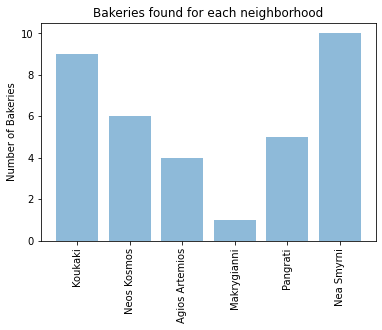

In [122]:
#import matplotlib.pyplot as plt; plt.rcdefaults()
#import numpy as np
import matplotlib.pyplot as plt

areas = ('Koukaki', 'Neos Kosmos', 'Agios Artemios', 'Makrygianni', 'Pangrati', 'Nea Smyrni')
y_pos = np.arange(len(areas))
bakeries_total = [9,6,4,1,5,10]

plt.bar(y_pos, bakeries_total, align='center', alpha=0.5)
plt.xticks(y_pos, areas, rotation='vertical')
plt.ylabel('Number of Bakeries')
plt.title('Bakeries found for each neighborhood')

plt.show()



In [80]:
#Use geopy library to center the map on Neos Kosmos for better visualization

address = ['Neos Kosmos, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Athens are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Athens are Latitude: 37.9576705, Longitude: 23.7283724.


<h4>Locations of all the Bakeries on the map of Athens

In [81]:
map_bakeries = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, name in zip(bakeries_stack['Latitude'], bakeries_stack['Longitude'], bakeries_stack['Bakery']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bakeries)  
    # add markers to map
for lat, lng, name in zip(makrygianni_bakeries['Latitude'], makrygianni_bakeries['Longitude'], makrygianni_bakeries['Bakery']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bakeries)  
    
map_bakeries

<h1> Further exploration of the neighborhood "Makrygianni"

In [82]:
#Let's explore the fourth neighborhood "Makrygianni" in our dataframe.

makrygianni_latitude = df_neigh.loc[3, 'Latitude'] # neighborhood latitude value
makrygianni_longitude = df_neigh.loc[3, 'Longitude'] # neighborhood longitude value

makrygianni = df_neigh.loc[3, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(makrygianni, 
                                                               makrygianni_latitude, 
                                                               makrygianni_longitude))



Latitude and longitude values of Makrygianni, Athens are 37.9687219, 23.7295949.


<h3>Search for Museums in the area

In [83]:
#get the Museums that are in "Makrygianni" within a radius of 250 meters.
#create the GET request URL
#Museum Category Id = 4bf58dd8d48988d181941735
LIMIT = 50
radius = 250

url_makrygianni_museums = 'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9687219,23.7295949&radius=250&limit=50&categoryId=4bf58dd8d48988d181941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    makrygianni_latitude, 
    makrygianni_longitude, 
    radius, 
    LIMIT)
url_makrygianni_museums # display URL




'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9687219,23.7295949&radius=250&limit=50&categoryId=4bf58dd8d48988d181941735'

In [84]:
#Send the GET request and examine the resutls

results_makrygianni_museums = requests.get(url_makrygianni_museums).json()


In [85]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#clean the json and structure it into a *pandas* dataframe.

venues_makrygianni_museums = results_makrygianni_museums ['response']['venues']


In [86]:
nearby_venues_makrygianni_museums = pd.json_normalize(venues_makrygianni_museums) # flatten JSON


In [87]:
# filter columns
filtered_columns = ['name','location.lat','location.lng']
nearby_venues_makrygianni_museums =nearby_venues_makrygianni_museums.loc[:, filtered_columns]
nearby_venues_makrygianni_museums.head()

,name,location.lat,location.lng
0,Acropolis Museum (Μουσείο Ακρόπολης),37.968821,23.728256
1,Acropolis Museum Shop,37.968553,23.728198
2,Athens Pinball Museum,37.969429,23.730609
3,Μουσείο Ελληνικής Λαϊκής Τέχνης (Παράρτημα Θέσ...,37.971425,23.729773
4,Ilias Lalaounis Jewelry Museum (Μουσείο Κοσμήμ...,37.969154,23.726667


In [88]:
#Rename name, location.lat, location.lng columns
makrygianni_museums = nearby_venues_makrygianni_museums.rename(columns={'name': 'Museum', 'location.lat': 'Latitude', 'location.lng': 'Longitude'})

print(makrygianni_museums.shape)
makrygianni_museums

(6, 3)


,Museum,Latitude,Longitude
0,Acropolis Museum (Μουσείο Ακρόπολης),37.968821,23.728256
1,Acropolis Museum Shop,37.968553,23.728198
2,Athens Pinball Museum,37.969429,23.730609
3,Μουσείο Ελληνικής Λαϊκής Τέχνης (Παράρτημα Θέσ...,37.971425,23.729773
4,Ilias Lalaounis Jewelry Museum (Μουσείο Κοσμήμ...,37.969154,23.726667
5,Το Σπιτι Των Παραμυθιών,37.967045,23.731314


In [89]:
#And how many recommended places were returned by Foursquare?

print('{} museums were returned by Foursquare.'.format(makrygianni_museums.shape[0]))

6 museums were returned by Foursquare.


In [90]:
#Use geopy library to get the latitude and longitude values of Makrygianni

address = ['Makrygianni, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Makrygianni are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Makrygianni are Latitude: 37.9687219, Longitude: 23.7295949.


<h4>Locations of the Museums on the map

In [91]:
map_makrygianni_museums = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, name in zip(makrygianni_museums['Latitude'], makrygianni_museums['Longitude'], makrygianni_museums['Museum']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni_museums)  
    
map_makrygianni_museums

<h3>Search for Monuments/Landmarks in the area

In [92]:
#get the Monuments / Landmarks that are in "Makrygianni" within a radius of 250 meters.
#create the GET request URL
#Monuments Category Id = 4bf58dd8d48988d12d941735
LIMIT = 50
radius = 250

url_makrygianni_landmarks = 'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9687219,23.7295949&radius=250&limit=50&categoryId=4bf58dd8d48988d12d941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    makrygianni_latitude, 
    makrygianni_longitude, 
    radius, 
    LIMIT)
url_makrygianni_landmarks # display URL




'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9687219,23.7295949&radius=250&limit=50&categoryId=4bf58dd8d48988d12d941735'

In [93]:
#Send the GET request and examine the resutls

results_makrygianni_landmarks = requests.get(url_makrygianni_landmarks).json()


In [94]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#clean the json and structure it into a *pandas* dataframe.

venues_makrygianni_landmarks = results_makrygianni_landmarks ['response']['venues']


In [95]:
nearby_venues_makrygianni_landmarks = pd.json_normalize(venues_makrygianni_landmarks) # flatten JSON


In [96]:
# filter columns
filtered_columns = ['name','location.lat','location.lng']
nearby_venues_makrygianni_landmarks =nearby_venues_makrygianni_landmarks.loc[:, filtered_columns]
nearby_venues_makrygianni_landmarks.head()

,name,location.lat,location.lng
0,Hadrian's Arch (Πύλη του Αδριανού),37.970152,23.731856
1,Temple of Olympian Zeus (Ναός Ολυμπίου Διός),37.969297,23.732722
2,Melina Mercouri Statue (Μνημείο Μελίνας Μερκούρη),37.969907,23.731526
3,Διεύθυνση Αναστήλωσης Βυζαντινών και Μεταβυζαν...,37.966947,23.728561


In [97]:
#Rename name, location.lat, location.lng columns
makrygianni_landmarks = nearby_venues_makrygianni_landmarks.rename(columns={'name': 'Museum', 'location.lat': 'Latitude', 'location.lng': 'Longitude'})

print(makrygianni_landmarks.shape)
makrygianni_landmarks

(4, 3)


,Museum,Latitude,Longitude
0,Hadrian's Arch (Πύλη του Αδριανού),37.970152,23.731856
1,Temple of Olympian Zeus (Ναός Ολυμπίου Διός),37.969297,23.732722
2,Melina Mercouri Statue (Μνημείο Μελίνας Μερκούρη),37.969907,23.731526
3,Διεύθυνση Αναστήλωσης Βυζαντινών και Μεταβυζαν...,37.966947,23.728561


In [98]:
#And how many recommended places were returned by Foursquare?

print('{} landmarks were returned by Foursquare.'.format(makrygianni_landmarks.shape[0]))

4 landmarks were returned by Foursquare.


In [99]:
#Use geopy library to get the latitude and longitude values of Makrygianni

address = ['Makrygianni, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Makrygianni are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Makrygianni are Latitude: 37.9687219, Longitude: 23.7295949.


<h4>Locations of monuments/landmarks on the map

In [100]:
map_makrygianni_landmarks = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, name in zip(makrygianni_landmarks['Latitude'], makrygianni_landmarks['Longitude'], makrygianni_landmarks['Museum']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni_landmarks)  
    
map_makrygianni_landmarks

<h4>Locations of tourist attractions (Museums and Monuments/Landmarks) on the map

In [101]:
print("Map Legend:\n Red: Museums\n Orange: Monuments/Landmarks ")

map_makrygianni_museums_landmarks = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, name in zip(makrygianni_museums['Latitude'], makrygianni_museums['Longitude'], makrygianni_museums['Museum']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni_museums_landmarks)  
#add markers to map
for lat, lng, name in zip(makrygianni_landmarks['Latitude'], makrygianni_landmarks['Longitude'], makrygianni_landmarks['Museum']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni_museums_landmarks)  
   
map_makrygianni_museums_landmarks

Map Legend:
 Red: Museums
 Orange: Monuments/Landmarks 


<h3>Locate the Bus Stops in the area

In [102]:
#get the Bus stops that are in "Makrygianni" within a radius of 250 meters.
#create the GET request URL
#Bus stop Category Id = 52f2ab2ebcbc57f1066b8b4f
LIMIT = 50
radius = 250

url_makrygianni_bus = 'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9687219,23.7295949&radius=250&limit=50&categoryId=52f2ab2ebcbc57f1066b8b4f'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    makrygianni_latitude, 
    makrygianni_longitude, 
    radius, 
    LIMIT)
url_makrygianni_bus # display URL




'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9687219,23.7295949&radius=250&limit=50&categoryId=52f2ab2ebcbc57f1066b8b4f'

In [103]:
#Send the GET request and examine the resutls

results_makrygianni_bus = requests.get(url_makrygianni_bus).json()


In [104]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#clean the json and structure it into a *pandas* dataframe.

venues_makrygianni_bus = results_makrygianni_bus ['response']['venues']


In [105]:
nearby_venues_makrygianni_bus = pd.json_normalize(venues_makrygianni_bus) # flatten JSON


In [106]:
# filter columns
filtered_columns = ['name','location.lat','location.lng']
nearby_venues_makrygianni_bus =nearby_venues_makrygianni_bus.loc[:, filtered_columns]
nearby_venues_makrygianni_bus.head()

,name,location.lat,location.lng
0,Makrygianni Bus Station (Στάση Μακρυγιάννη),37.967879,23.731003
1,Στάση Δαμαγήτου,37.969813,23.732338
2,Στάση Μουσείο Ακρόπολης (230),37.967758,23.727370


In [107]:
#Rename name, location.lat, location.lng columns
makrygianni_bus = nearby_venues_makrygianni_bus.rename(columns={'name': 'Bus stop', 'location.lat': 'Latitude', 'location.lng': 'Longitude'})

print(makrygianni_bus.shape)
makrygianni_bus

(3, 3)


,Bus stop,Latitude,Longitude
0,Makrygianni Bus Station (Στάση Μακρυγιάννη),37.967879,23.731003
1,Στάση Δαμαγήτου,37.969813,23.732338
2,Στάση Μουσείο Ακρόπολης (230),37.967758,23.727370


In [108]:
#And how many recommended places were returned by Foursquare?

print('{} bus stops were returned by Foursquare.'.format(makrygianni_bus.shape[0]))

3 bus stops were returned by Foursquare.


In [109]:
#Use geopy library to get the latitude and longitude values of Makrygianni

address = ['Makrygianni, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Makrygianni are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Makrygianni are Latitude: 37.9687219, Longitude: 23.7295949.


<h4>Locations of the bus stops on the map

In [110]:
map_makrygianni_bus = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, name in zip(makrygianni_bus['Latitude'], makrygianni_bus['Longitude'], makrygianni_bus['Bus stop']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni_bus)  
    
map_makrygianni_bus

<h3>Locate the Metro station in the area

In [111]:
#get the Metro station that are in "Makrygianni" within a radius of 250 meters.
#create the GET request URL
#Metro station Category Id = 4bf58dd8d48988d1fd931735
LIMIT = 50
radius = 250

url_makrygianni_metro = 'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9687219,23.7295949&radius=250&limit=50&categoryId=4bf58dd8d48988d1fd931735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    makrygianni_latitude, 
    makrygianni_longitude, 
    radius, 
    LIMIT)
url_makrygianni_metro # display URL




'https://api.foursquare.com/v2/venues/search?&client_id=05H45WXNVDOCSKSJ0KIBLKAK4EZJ25BRNCJZLS4TT2CI4Z5N&client_secret=XHGLXP23BMRY3ONDZJB2OUIHHZDYM4IUBDDNCWJ0ZZ2RFC4E&v=20200814&ll=37.9687219,23.7295949&radius=250&limit=50&categoryId=4bf58dd8d48988d1fd931735'

In [112]:
#Send the GET request and examine the resutls

results_makrygianni_metro = requests.get(url_makrygianni_metro).json()


In [113]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#clean the json and structure it into a *pandas* dataframe.

venues_makrygianni_metro = results_makrygianni_metro ['response']['venues']


In [114]:
nearby_venues_makrygianni_metro = pd.json_normalize(venues_makrygianni_metro) # flatten JSON


In [115]:
# filter columns
filtered_columns = ['name','location.lat','location.lng']
nearby_venues_makrygianni_metro =nearby_venues_makrygianni_metro.loc[:, filtered_columns]
nearby_venues_makrygianni_metro.head()

,name,location.lat,location.lng
0,Akropoli Metro Station (Σταθμός Μετρό Ακρόπολη),37.968516,23.730195


In [116]:
#Rename name, location.lat, location.lng columns
makrygianni_metro = nearby_venues_makrygianni_metro.rename(columns={'name': 'Metro station', 'location.lat': 'Latitude', 'location.lng': 'Longitude'})

print(makrygianni_metro.shape)
makrygianni_metro

(1, 3)


,Metro station,Latitude,Longitude
0,Akropoli Metro Station (Σταθμός Μετρό Ακρόπολη),37.968516,23.730195


In [117]:
#And how many recommended places were returned by Foursquare?

print('{} metro stations were returned by Foursquare.'.format(makrygianni_metro.shape[0]))

1 metro stations were returned by Foursquare.


In [118]:
#Use geopy library to get the latitude and longitude values of Makrygianni

address = ['Makrygianni, Athens, GR']
geolocator = Nominatim(user_agent="athens_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Makrygianni are Latitude: {}, Longitude: {}.'.format(latitude, longitude))

The geograpical coordinate of Makrygianni are Latitude: 37.9687219, Longitude: 23.7295949.


<h4>Locations of the metro stations on the map

In [119]:
map_makrygianni_metro = folium.Map(location=[latitude, longitude], zoom_start=16)

# add markers to map
for lat, lng, name in zip(makrygianni_metro['Latitude'], makrygianni_metro['Longitude'], makrygianni_metro['Metro station']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni_metro)  
    
map_makrygianni_metro

<h3>Place all points of interest on the map

In [120]:
print("Map Legend:\n Blue: Metro station\n Green: Bus stops\n Red: Museums\n Black: Takis Bakery\n Orange: Monuments/Landmarks ")

map_makrygianni_research = folium.Map(location=[latitude, longitude], zoom_start=16)

# add metro station markers to map
for lat, lng, name in zip(makrygianni_metro['Latitude'], makrygianni_metro['Longitude'], makrygianni_metro['Metro station']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni_research)  

# add bus stops markers to map
for lat, lng, name in zip(makrygianni_bus['Latitude'], makrygianni_bus['Longitude'], makrygianni_bus['Bus stop']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni_research)  

# add museum markers to map
for lat, lng, name in zip(makrygianni_museums['Latitude'], makrygianni_museums['Longitude'], makrygianni_museums['Museum']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni_research)  
# add Bakery to map
for lat, lng, name in zip(makrygianni_bakeries['Latitude'], makrygianni_bakeries['Longitude'], makrygianni_bakeries['Bakery']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.9,
        parse_html=False).add_to(map_makrygianni_research)  

# add markers to map
for lat, lng, name in zip(makrygianni_landmarks['Latitude'], makrygianni_landmarks['Longitude'], makrygianni_landmarks['Museum']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makrygianni_research)  
map_makrygianni_research

Map Legend:
 Blue: Metro station
 Green: Bus stops
 Red: Museums
 Black: Takis Bakery
 Orange: Monuments/Landmarks 
